In [6]:
import torchvision
from torchvision import datasets
import numpy
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [8]:
# Data download and preprocessing
DOWNLOAD_MNIST = True# If already download , set as False
train_data = datasets.MNIST (
    root ="./ mnist /", 
    train = True , # this is training data
    # transform = torchvision . transforms . ToTensor () , 
    download = DOWNLOAD_MNIST ,
)
test_data = torchvision.datasets.MNIST ( root ='./ mnist /', train = False )

# change the features to numpy
X_train = train_data.train_data.numpy()
X_test = test_data.test_data.numpy()

# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

### 1. Familiarize with the data

#### a.

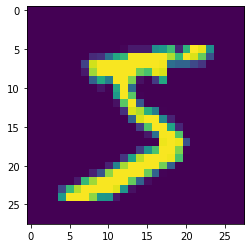

In [9]:
plt.imshow(X_train[0].reshape(28,28))

In [10]:
Y_train[0]

5

The number I see in the X_train is the same as the lable in Y_train.

#### b.

In [11]:
# Get dimensions
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)

X_train Shape: (60000, 28, 28)
X_test Shape: (10000, 28, 28)


In [12]:
# Normalize X_train and X_test
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
scaled_x_train = min_max_scaler.fit_transform(X_train.reshape(-1,784))
scaled_x_test = min_max_scaler.fit_transform(X_test.reshape(-1,784))

#### c.

In [27]:
one_hot = sklearn.preprocessing.OneHotEncoder()
Y_train_one_hot = one_hot.fit_transform(Y_train.reshape(-1,1))
Y_test_one_hot = one_hot.fit_transform(Y_test.reshape(-1,1))

Using one hot embedding helps us to calculate the distance between labels for mse. For instance, the distance between 10 and 1 equals to the distance between 1 and 2.

### 2

#### (a). KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
for i in  range(2,8):
    model = KNeighborsClassifier(n_neighbors=i)
    # Train the model using the training sets
    model.fit(scaled_x_train,Y_train)
    predicted= model.predict(scaled_x_test) 
    c = (predicted == Y_test)
    print('K=',i, 'accuracy:', numpy.mean(c), 'error rate:', 1-numpy.mean(c))


K= 2 accuracy: 0.9627 error rate: 0.0373
K= 3 accuracy: 0.9705 error rate: 0.02949999999999997
K= 4 accuracy: 0.9682 error rate: 0.03180000000000005
K= 5 accuracy: 0.9688 error rate: 0.031200000000000006
K= 6 accuracy: 0.9677 error rate: 0.032299999999999995
K= 7 accuracy: 0.9694 error rate: 0.03059999999999996


For K=3, we got the smallest error rate 2.9%, which is even smaller than the test error 5%.

#### (a). Adaboost.M1/C4.5

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
for i in range(1,8):
        model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i), n_estimators=30)
        # Train the model using the training sets
        model.fit(scaled_x_train,Y_train)
        predicted= model.predict(scaled_x_test) 
        print('depth:',i,"Accuracy:",metrics.accuracy_score(Y_test, predicted))

depth: 1 Accuracy: 0.7071
depth: 2 Accuracy: 0.7712
depth: 3 Accuracy: 0.8302
depth: 4 Accuracy: 0.8081
depth: 5 Accuracy: 0.8068
depth: 6 Accuracy: 0.848
depth: 7 Accuracy: 0.8721


In [56]:
for i in range(8,11):
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i), n_estimators=30)
        # Train the model using the training sets
    model.fit(scaled_x_train,Y_train)
    predicted= model.predict(scaled_x_test) 
    print('depth:',i,"Accuracy:",metrics.accuracy_score(Y_test, predicted))

depth: 8 Accuracy: 0.8989
depth: 9 Accuracy: 0.9164
depth: 10 Accuracy: 0.9292


In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
for j in range(10,90,10):
        model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=j)
        # Train the model using the training sets
        model.fit(scaled_x_train,Y_train)
        predicted= model.predict(scaled_x_test) 
        print('n_estimators:',j,"Accuracy:",metrics.accuracy_score(Y_test, predicted))

n_estimators: 10 Accuracy: 0.8821
n_estimators: 20 Accuracy: 0.9112
n_estimators: 30 Accuracy: 0.9246
n_estimators: 40 Accuracy: 0.9378
n_estimators: 50 Accuracy: 0.9418
n_estimators: 60 Accuracy: 0.9471
n_estimators: 70 Accuracy: 0.9471
n_estimators: 80 Accuracy: 0.9537


In [61]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=90)
        # Train the model using the training sets
model.fit(scaled_x_train,Y_train)
predicted= model.predict(scaled_x_test) 
print('n_estimators: 90',"Accuracy:",metrics.accuracy_score(Y_test, predicted))

n_estimators: 90 Accuracy: 0.9555


For this model, we choose max_depth = 10 and n_estimators = 90. The accuracy rate is 95.55%, and the error rate is 4.45%. It is quite close to the test error 4.05%.

#### (a). SVM with Gaussian Kernel

In [ ]:
from sklearn.svm import SVC
for i in {0.01, 0.1, 1, 10, 100, 1000}:
    model = SVC(kernel="rbf", gamma="auto", C=i)
    # Train the model using the training sets
    model.fit(scaled_x_train,Y_train)
    predicted= model.predict(scaled_x_test) 
    print('C=',i,"Accuracy:",metrics.accuracy_score(Y_test, predicted))

C= 0.1 Accuracy: 0.9166
C= 1 Accuracy: 0.9446
C= 100 Accuracy: 0.9761
C= 1000 Accuracy: 0.975
C= 10 Accuracy: 0.9614


In [66]:
from sklearn.svm import SVC
for i in {0.01, 0.1, 1, 10, 100, 1000}:
    model = SVC(kernel="rbf", C=i)
    # Train the model using the training sets
    model.fit(scaled_x_train,Y_train)
    predicted= model.predict(scaled_x_test) 
    print('C=',i,"Accuracy:",metrics.accuracy_score(Y_test, predicted))

C= 0.1 Accuracy: 0.9595
C= 1 Accuracy: 0.9793
C= 100 Accuracy: 0.9834
C= 1000 Accuracy: 0.9834
C= 10 Accuracy: 0.9838
C= 0.01 Accuracy: 0.9258


When using C = 10, and gamma = 'scale', we got the highest accuracy 98.34%. The error rate of this model is 1.64%. It is close to the test error 1.4%.

#### (b). Pick favorite classifier.

In [33]:
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
input_shape = (28, 28, 1)

x_train = X_train/255
x_test = X_test/255
x_train = numpy.expand_dims(x_train, -1)
x_test = numpy.expand_dims(x_test, -1)
y_train = keras.utils.to_categorical(Y_train, 10)
y_test = keras.utils.to_categorical(Y_test, 10)

model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Nadam(0.001), metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1)



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 5, 5, 64)         

In [37]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: ',round(score[1],4), 'Error Rate: ', round(1-score[1],4))

Accuracy:  0.9933 Error Rate:  0.0067


I pick the neural network model CGG. The accuracy of this model is 99.33%, and error rate is 0.67%. It out perform all three of the classifier I implemented in part 2(a).